# Spam Ham classification_

In [52]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.datasets import load_files
import pickle
from nltk.corpus import stopwords
import chardet

- https://stackoverflow.com/questions/33819557/unicodedecodeerror-utf-8-codec-while-reading-a-csv-file
- https://medium.com/swlh/confusion-matrix-and-classification-report-88105288d48f#:~:text=Weighted%20average%3A%20the%20weighted%20average%20is%20calculated%20by,47%29%2F%20%2867%20%2B%2047%29%20%3D%200.93%20%3D%2094%25

In [53]:
df=pd.read_csv('spam.csv', encoding='latin')

In [54]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [56]:
df=df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


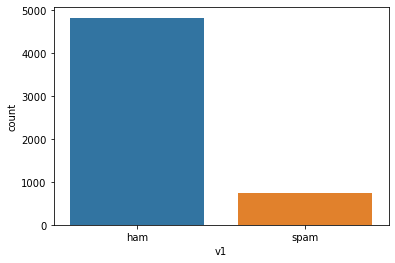

In [57]:
sns.countplot(x=df['v1'])
plt.show()

In [58]:
df.shape,df.nunique()

((5572, 2),
 v1       2
 v2    5169
 dtype: int64)

In [59]:
df.groupby('v1').count()

,v2
v1,
ham,4825
spam,747


In [60]:
df.groupby('v2').count()

,v1
v2,
&lt;#&gt; in mca. But not conform.,1
&lt;#&gt; mins but i had to stop somewhere first.,1
&lt;DECIMAL&gt; m but its not a common car here so its better to buy from china or asia. Or if i find it less expensive. I.ll holla,1
and picking them up from various points,1
"came to look at the flat, seems ok, in his 50s? * Is away alot wiv work. Got woman coming at 6.30 too.",1
...,...
ÌÏ still got lessons? ÌÏ in sch?,1
ÌÏ takin linear algebra today?,1
ÌÏ thk of wat to eat tonight.,1


In [61]:
df['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [62]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [63]:
# method 1
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['v1']=lb.fit_transform(df['v1'])
df['v1'][:5]

C:\Users\omkan\AppData\Local\Temp/ipykernel_876/3145744243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v1']=lb.fit_transform(df['v1'])


0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int32

In [64]:
# method - 2
df['v1']=df['v1'].replace({0:0,1:1})
df['v1'][:5]

C:\Users\omkan\AppData\Local\Temp/ipykernel_876/4050133740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v1']=df['v1'].replace({0:0,1:1})


0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int64

In [65]:
df['v2'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [66]:
from nltk.tokenize import RegexpTokenizer
# tokenizer remove unwanted elements from out data like symbols and numbers, special charactor
tn = RegexpTokenizer(r'[a-zA-Z0-9]')

In [67]:
import re

In [68]:
# example -
first_msg=df['v2'][4]
print(first_msg)
msg=re.sub('[^a-zA-Z]',' ',first_msg)
msg=msg.lower()
msg

Nah I don't think he goes to usf, he lives around here though


'nah i don t think he goes to usf  he lives around here though'

In [69]:
# removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#eg.
msg = msg.split()
print(msg)

['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omkan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
# Lemmantization
import nltk as nlp
lemma= nlp.WordNetLemmatizer()
#eg.
msg=[lemma.lemmatize(word) for word in msg]
msg= " ".join(msg)
msg

'nah i don t think he go to usf he life around here though'

In [71]:
# string Libracy
import string 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [72]:
str.maketrans('XYZ','abc')

{88: 97, 89: 98, 90: 99}

In [73]:
# Removing Punctuation
def remove_punc(text):
    translator = str.maketrans('','',string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [74]:
df['v2']=df['v2'].apply(remove_punc)
df.head(10)

C:\Users\omkan\AppData\Local\Temp/ipykernel_876/4044612299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v2']=df['v2'].apply(remove_punc)


,v1,v2
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives aroun...
5,1,FreeMsg Hey there darling its been 3 weeks now...
6,0,Even my brother is not like to speak with me T...
7,0,As per your request Melle Melle Oru Minnaminun...
8,1,WINNER As a valued network customer you have b...
9,1,Had your mobile 11 months or more U R entitled...


In [75]:
sw=set(stopwords.words('english'))
print(sw)

{'doesn', 'our', 'won', 'isn', 'from', "won't", 'was', 'hadn', 'because', 'down', 'wouldn', "you're", 'why', 've', 'own', "shouldn't", 'the', "you'll", 'above', 'my', 'if', "didn't", 'had', 'few', "hasn't", 't', 'same', "doesn't", 'yourselves', 'who', 'not', 're', 'we', 'm', 'his', 'haven', 'mightn', 'such', "mightn't", 'don', 'which', 'again', 'is', 'doing', 'after', 'just', 'until', 'through', 'hasn', 'no', 'only', 'for', 'he', 'weren', 'nor', 'at', 'to', "aren't", 'with', 'those', 'when', 'd', 'y', "you've", 'your', 'wasn', 'they', 'these', 'some', 's', "shan't", 'whom', 'very', "you'd", 'a', 'into', 'didn', "wasn't", 'i', 'its', "weren't", "should've", 'does', 'this', 'me', 'under', 'being', 'them', 'theirs', 'once', 'during', 'll', "couldn't", 'up', 'out', 'off', 'it', 'hers', 'so', 'been', 'has', 'will', 'ours', 'of', 'before', 'herself', "wouldn't", "mustn't", 'all', 'have', "isn't", 'an', 'were', 'more', 'mustn', 'both', "hadn't", 'am', 'too', 'himself', 'be', 'and', 'ain', "th

In [76]:
msg_list=[]
for i in df['v2']:
    txt=re.sub('[^a-zA-Z]',' ',i)             # remove punctuation
    txt=txt.lower()                           # convert to lower
    txt=nltk.word_tokenize(txt)               # tokenize the words
    txt=[i for i in txt if not i in sw]       # stop words removal
    lemma = nlp.WordNetLemmatizer()
    txt=[lemma.lemmatize(word) for word in txt]
    txt= ' '.join(txt)
    msg_list.append(txt)

In [77]:
msg_list

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply',
 'u dun say early hor u c already say',
 'nah dont think go usf life around though',
 'freemsg hey darling week word back id like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'im gon na home soon dont want talk stuff anymore tonight k ive cried enough today',
 'six chance win cash pound txt csh send cost pday day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim tc wwwdbuknet lc

### countVectorizer
- Naive Baiyes - Bernoulli, Multinomial
- Logistic Regression
- Decision Tree
- Rendom Forest Classifire
- K-Nearest Neighbour
- Support vactor Machine - kernel - poly,linear,rbf,sigmoid

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
#cv=CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1),tokenizer=tn.tokenize)
cv=CountVectorizer()

In [79]:
x_cv=cv.fit_transform(msg_list)#.toarray()
x_cv

<5572x7789 sparse matrix of type '<class 'numpy.int64'>'
	with 45390 stored elements in Compressed Sparse Row format>

In [80]:
x_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
x_cv

<5572x7789 sparse matrix of type '<class 'numpy.int64'>'
	with 45390 stored elements in Compressed Sparse Row format>

### spliting 

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_cv,df['v1'],test_size=.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4179, 7789), (1393, 7789), (4179,), (1393,))

### 1. Naive Bayes 

BernoulliNB()
predicted-y [0 0 0 0 1] actual-y [0 0 0 0 1]
predicted-y_shape (1393,) actual-y-shape (1393,)


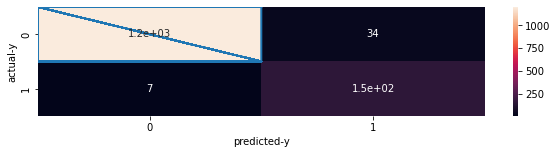

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1235
           1       0.82      0.96      0.88       158

    accuracy                           0.97      1393
   macro avg       0.91      0.96      0.93      1393
weighted avg       0.97      0.97      0.97      1393

accuracy-score 0.9705671213208902
Model score 0.9705671213208902


In [83]:
from sklearn.naive_bayes import BernoulliNB
c=BernoulliNB()
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

In [84]:
#macro avg
a=.98+.9
print(a/2)
#whight avg
a=.98*1197
b=.9*196
c=1197+196
d=a+b
c,d
print(d/c)

0.94
0.9687437185929648


https://www.jcchouinard.com/classification-report-in-scikit-learn/

https://medium.com/swlh/confusion-matrix-and-classification-report-88105288d48f#:~:text=Weighted%20average%3A%20the%20weighted%20average%20is%20calculated%20by,47%29%2F%20%2867%20%2B%2047%29%20%3D%200.93%20%3D%2094%25
    
-precision - tp/(tp+fp)  proportion of true positive among all the value predicted as positive
- accuracy-tp+tn/(tp+tn+fn+fp)
- recall - tp/(tp+fn)  porpostion of the positive value
- specificity tn/(tn+fp)- proportion of negative value corectly predicted
#macro avg
a=.98+.9
print(a/2)
#whight avg
a=.98*1197
b=.9*196
c=1197+196
d=a+b
c,d
print(d/c)

https://www.kaggle.com/code/nayansakhiya/spam-ham-classification

In [85]:
x_train[:1].shape,x_cv[:1].shape

((1, 7789), (1, 7789))

https://stackoverflow.com/questions/44806125/attributeerror-model-object-has-no-attribute-predict-classes

MultinomialNB()
predicted-y [0 0 0 0 1] actual-y [0 0 0 0 1]
predicted-y_shape (1393,) actual-y-shape (1393,)


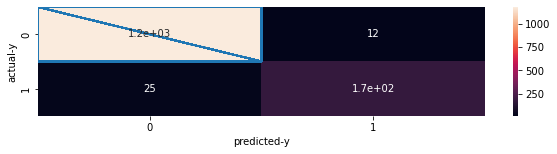

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1195
           1       0.94      0.87      0.90       198

    accuracy                           0.97      1393
   macro avg       0.96      0.93      0.94      1393
weighted avg       0.97      0.97      0.97      1393

accuracy-score 0.9734386216798278
Model score 0.9734386216798278


In [86]:
from sklearn.naive_bayes import MultinomialNB
c=MultinomialNB()
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

# Logistic Regression

LogisticRegression()
predicted-y [0 0 0 0 0] actual-y [0 0 0 0 1]
predicted-y_shape (1393,) actual-y-shape (1393,)


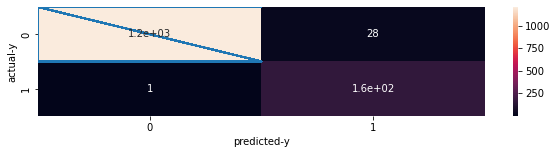

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1235
           1       0.85      0.99      0.92       158

    accuracy                           0.98      1393
   macro avg       0.92      0.99      0.95      1393
weighted avg       0.98      0.98      0.98      1393

accuracy-score 0.9791816223977028
Model score 0.9791816223977028


In [87]:
from sklearn.linear_model import LogisticRegression
c=LogisticRegression()
print(c.fit(x_train,y_train.values))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

# Decision Tree 

DecisionTreeClassifier()
predicted-y [0 0 0 0 0] actual-y [0 0 0 0 1]
predicted-y_shape (1393,) actual-y-shape (1393,)


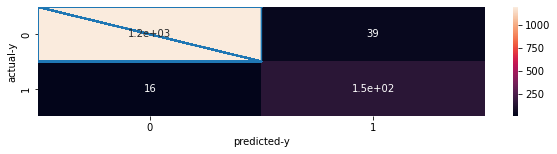

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1231
           1       0.79      0.90      0.84       162

    accuracy                           0.96      1393
   macro avg       0.89      0.93      0.91      1393
weighted avg       0.96      0.96      0.96      1393

accuracy-score 0.9605168700646087
Model score 0.9605168700646087


In [88]:
from sklearn.tree import DecisionTreeClassifier
c=DecisionTreeClassifier()
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

# Rendom Forest

RandomForestClassifier()
predicted-y [0 0 0 0 0] actual-y [0 0 0 0 1]
predicted-y_shape (1393,) actual-y-shape (1393,)


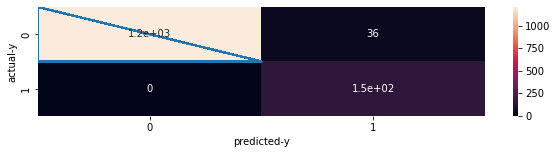

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1244
           1       0.81      1.00      0.89       149

    accuracy                           0.97      1393
   macro avg       0.90      0.99      0.94      1393
weighted avg       0.98      0.97      0.98      1393

accuracy-score 0.9741564967695621
Model score 0.9741564967695621


In [89]:
from sklearn.ensemble import RandomForestClassifier
c=RandomForestClassifier()
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

# Support Vecter Machine 

SVC(kernel='poly')
predicted-y [0 0 0 0 0] actual-y [0 0 0 0 1]
predicted-y_shape (1393,) actual-y-shape (1393,)


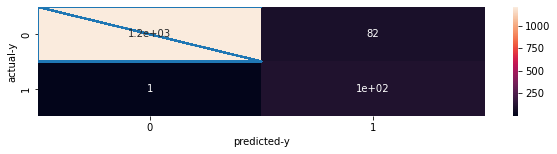

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1289
           1       0.56      0.99      0.71       104

    accuracy                           0.94      1393
   macro avg       0.78      0.96      0.84      1393
weighted avg       0.97      0.94      0.95      1393

accuracy-score 0.9404163675520459
Model score 0.9404163675520459


In [90]:
from sklearn.svm import SVC
c=SVC(kernel='poly')
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

SVC(kernel='linear')
predicted-y [0 0 0 0 0] actual-y [0 0 0 0 1]
predicted-y_shape (1393,) actual-y-shape (1393,)


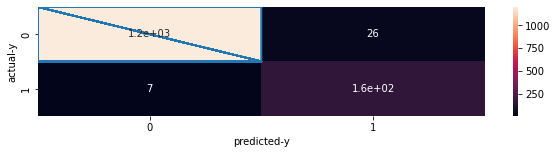

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1227
           1       0.86      0.96      0.91       166

    accuracy                           0.98      1393
   macro avg       0.93      0.97      0.95      1393
weighted avg       0.98      0.98      0.98      1393

accuracy-score 0.9763101220387652
Model score 0.9763101220387652


In [91]:
from sklearn.svm import SVC
c=SVC(kernel='linear')
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

SVC()
predicted-y [0 0 0 0 0] actual-y [0 0 0 0 1]
predicted-y_shape (1393,) actual-y-shape (1393,)


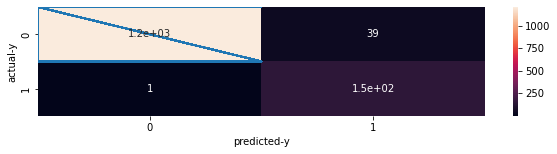

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1246
           1       0.79      0.99      0.88       147

    accuracy                           0.97      1393
   macro avg       0.89      0.98      0.93      1393
weighted avg       0.98      0.97      0.97      1393

accuracy-score 0.9712849964106246
Model score 0.9712849964106246


In [92]:
from sklearn.svm import SVC
c=SVC(kernel='rbf')
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

# [Tfidf] - Term Frequncy Inverse Document Frequency
- Naive Bayes - MultinomialNB, BernaulliNB
- DecisionTreeClassifier
- RandomForestClassifier
- SVC poly,linear, rbf

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x_tf=tf.fit_transform(df['v2'])

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_cv,df['v1'],test_size=.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4179, 7789), (1393, 7789), (4179,), (1393,))

# Naive Bayes

BernoulliNB()
predicted-y [1 0 0 0 0] actual-y [1 0 0 0 0]
predicted-y_shape (1393,) actual-y-shape (1393,)


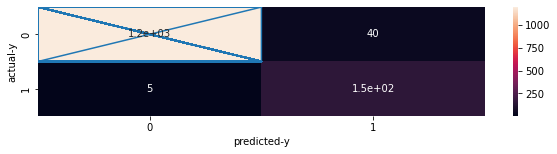

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1239
           1       0.79      0.97      0.87       154

    accuracy                           0.97      1393
   macro avg       0.89      0.97      0.93      1393
weighted avg       0.97      0.97      0.97      1393

accuracy-score 0.9676956209619526
Model score 0.9676956209619526


In [95]:
from sklearn.naive_bayes import BernoulliNB
c=BernoulliNB()
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

MultinomialNB()
predicted-y [1 0 0 0 0] actual-y [1 0 0 0 0]
predicted-y_shape (1393,) actual-y-shape (1393,)


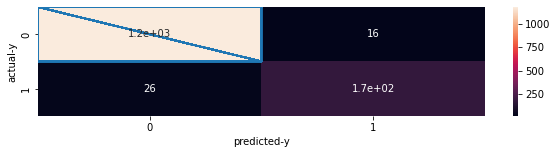

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1194
           1       0.92      0.87      0.89       199

    accuracy                           0.97      1393
   macro avg       0.95      0.93      0.94      1393
weighted avg       0.97      0.97      0.97      1393

accuracy-score 0.9698492462311558
Model score 0.9698492462311558


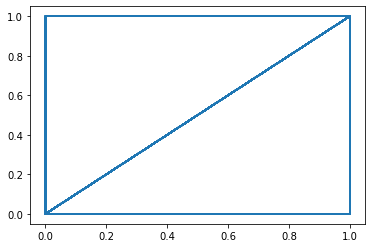

In [96]:
from sklearn.naive_bayes import MultinomialNB
c=MultinomialNB()
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))
plt.plot(y_pred,y_test)


# Decision Tree Clssifier

DecisionTreeClassifier()
predicted-y [0 0 0 0 0] actual-y [1 0 0 0 0]
predicted-y_shape (1393,) actual-y-shape (1393,)


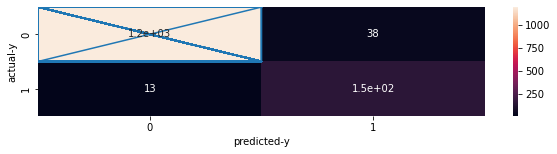

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1229
           1       0.80      0.92      0.86       164

    accuracy                           0.96      1393
   macro avg       0.89      0.94      0.92      1393
weighted avg       0.97      0.96      0.96      1393

accuracy-score 0.9633883704235463
Model score 0.9633883704235463


In [97]:
from sklearn.tree import DecisionTreeClassifier
c=DecisionTreeClassifier()
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

# Random Forest Classifier

RandomForestClassifier()
predicted-y [1 0 0 0 0] actual-y [1 0 0 0 0]
predicted-y_shape (1393,) actual-y-shape (1393,)


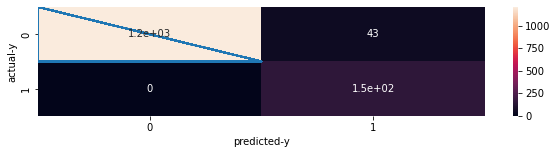

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1247
           1       0.77      1.00      0.87       146

    accuracy                           0.97      1393
   macro avg       0.89      0.98      0.93      1393
weighted avg       0.98      0.97      0.97      1393

accuracy-score 0.9691313711414213
Model score 0.9691313711414213


In [98]:
from sklearn.ensemble import RandomForestClassifier
c=RandomForestClassifier()
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

# Support Vecter Machine

SVC()
predicted-y [1 0 0 0 0] actual-y [1 0 0 0 0]
predicted-y_shape (1393,) actual-y-shape (1393,)


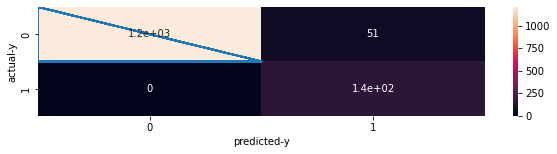

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1255
           1       0.73      1.00      0.84       138

    accuracy                           0.96      1393
   macro avg       0.87      0.98      0.91      1393
weighted avg       0.97      0.96      0.97      1393

accuracy-score 0.9633883704235463
Model score 0.9633883704235463


In [99]:
from sklearn.svm import SVC
c=SVC(kernel='rbf')
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

SVC(kernel='linear')
predicted-y [1 0 0 0 0] actual-y [1 0 0 0 0]
predicted-y_shape (1393,) actual-y-shape (1393,)


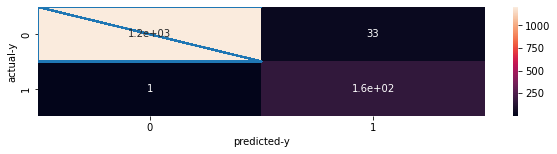

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1236
           1       0.83      0.99      0.90       157

    accuracy                           0.98      1393
   macro avg       0.91      0.98      0.94      1393
weighted avg       0.98      0.98      0.98      1393

accuracy-score 0.9755922469490309
Model score 0.9755922469490309


In [100]:
from sklearn.svm import SVC
c=SVC(kernel='linear')
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

SVC(kernel='poly')
predicted-y [0 0 0 0 0] actual-y [1 0 0 0 0]
predicted-y_shape (1393,) actual-y-shape (1393,)


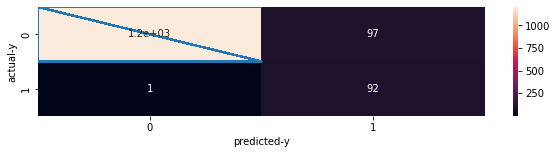

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1300
           1       0.49      0.99      0.65        93

    accuracy                           0.93      1393
   macro avg       0.74      0.96      0.81      1393
weighted avg       0.96      0.93      0.94      1393

accuracy-score 0.9296482412060302
Model score 0.9296482412060302


In [101]:
from sklearn.svm import SVC
c=SVC(kernel='poly')
print(c.fit(x_train,y_train))
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test.values[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.values.shape)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.plot(y_pred,y_test)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))